 Question 6. Using Titanic dataset, to do the following:

a. Clean the data by dropping the column which has the largest number of missing values.

b. Find total number of passengers with age more than 30

c. Find total fare paid by passengers of second class

d. Compare number of survivors of each passenger class

e. Compute descriptive statistics for age attribute gender wise

f. Draw a scatter plot for passenger fare paid by Female and Male passengers separately
g. Compare density distribution for features age and passenger fare

h. Draw the pie chart for three groups labelled as class 1, class 2, class 3 respectively displayed in different colours. The occurrence of each group converted into percentage should be displayed in the pie chart. Appropriately Label the chart.

i. Find % of survived passengers for each class and answer the question “Did class play a role in survival?”.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.drop(columns=(df.isnull().sum().idxmax()),inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df[df['age']>30]['age'].count()

np.int64(305)

In [ ]:
df.groupby('pclass')['fare'].sum()[2]

np.float64(3801.8417)

In [1]:
df.groupby('pclass')['survived'].sum()

NameError: name 'df' is not defined

In [ ]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [ ]:
male_fare=df[df['sex']=='male']['fare']
male_fare

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: fare, Length: 577, dtype: float64

In [ ]:
female_fare=df[df['sex']=='female']['fare']
female_fare

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
880    26.0000
882    10.5167
885    29.1250
887    30.0000
888    23.4500
Name: fare, Length: 314, dtype: float64

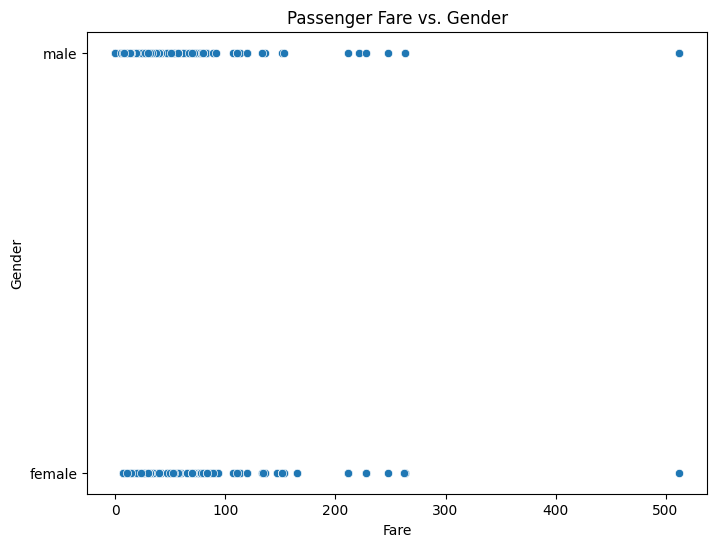

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fare', y='sex', data=df)
plt.title('Passenger Fare vs. Gender')
plt.xlabel('Fare')
plt.ylabel('Gender')
plt.show()

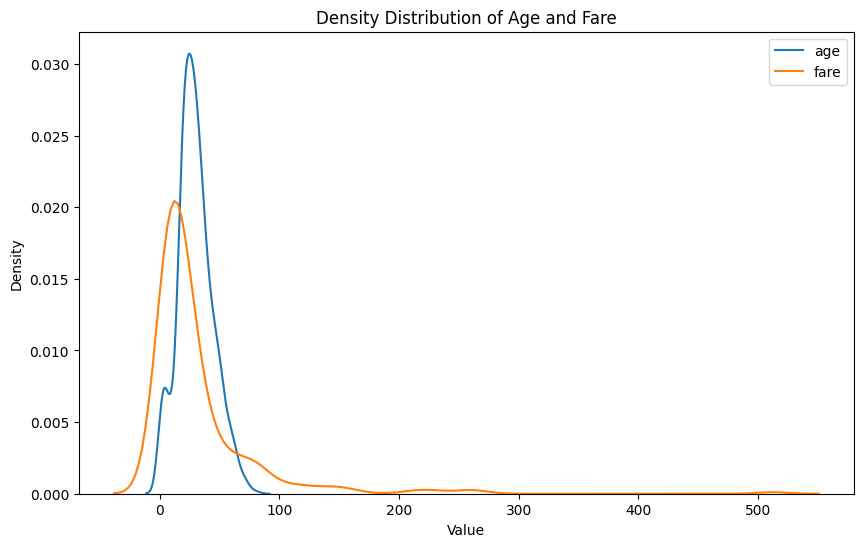

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], label='age')
sns.kdeplot(df['fare'], label='fare')
plt.title('Density Distribution of Age and Fare')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
def percentage(data):
  return data.sum() * 100 / data.count()
df.groupby('pclass')['survived'].agg(percentage)

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

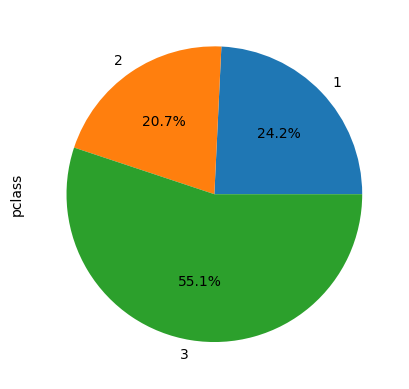

In [ ]:
df.groupby('pclass')['pclass'].count().plot(kind='pie',subplots=True,autopct='%.1f%%')
plt.show()

In [ ]:
df.groupby('pclass')['pclass'].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

7. Consider the following data frame containing a family name, gender of the family member and her/his monthly
income in each record. (data given in question)

Write a program in Python using Pandas to perform the following:
a.   Calculate and display familywise gross monthly income.
b.  Display the highest and lowest monthly income for each family name
c.  Calculate and display monthly income of all members earning income less than Rs. 80000.00.
d.  Display total number of females along with their average monthly income  
e. Delete rows with Monthly income less than the average income of all members

In [ ]:
df=pd.DataFrame({'FamilyName':['Shah','Vats','Vats','Kumar','Vats','Kumar','Shah','Shah','Kumar','Vats'],'Gender':['Male','Male','Female','Female','Female','Male','Male','Female','Female','Male'],'MonthlyIncome(Rs.)':[44000,65000,43150,66500,255000,103000,55000,112400,81030,71900]})
df

,FamilyName,Gender,MonthlyIncome(Rs.)
0,Shah,Male,44000
1,Vats,Male,65000
2,Vats,Female,43150
3,Kumar,Female,66500
4,Vats,Female,255000
5,Kumar,Male,103000
6,Shah,Male,55000
7,Shah,Female,112400
8,Kumar,Female,81030
9,Vats,Male,71900


In [ ]:
df.groupby('FamilyName')['MonthlyIncome(Rs.)'].sum()

FamilyName
Kumar    250530
Shah     211400
Vats     435050
Name: MonthlyIncome(Rs.), dtype: int64

In [ ]:
df.groupby('FamilyName')['MonthlyIncome(Rs.)'].agg(['max','min'])

,max,min
FamilyName,,
Kumar,103000,66500
Shah,112400,44000
Vats,255000,43150


In [ ]:
df.query('`MonthlyIncome(Rs.)`<80000')

,FamilyName,Gender,MonthlyIncome(Rs.)
0,Shah,Male,44000
1,Vats,Male,65000
2,Vats,Female,43150
3,Kumar,Female,66500
6,Shah,Male,55000
9,Vats,Male,71900


In [ ]:
ans=df.groupby('Gender')['MonthlyIncome(Rs.)'].agg(['count','mean']).loc['Female']
ans

count         5.0
mean     111616.0
Name: Female, dtype: float64

In [ ]:
avg=df.groupby('FamilyName')['MonthlyIncome(Rs.)'].mean()
avg

FamilyName
Kumar     83510.000000
Shah      70466.666667
Vats     108762.500000
Name: MonthlyIncome(Rs.), dtype: float64

In [ ]:

df.drop(df[df['MonthlyIncome(Rs.)']<df['MonthlyIncome(Rs.)'].mean()].index)

,FamilyName,Gender,MonthlyIncome(Rs.)
4,Vats,Female,255000
5,Kumar,Male,103000
7,Shah,Female,112400
